Начальная настройка парсера


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv

base_url = "https://habr.com/ru/flows/develop/articles/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)  Chrome/110.0.0.0 Safari/537.36"
}
# счётчитк
all_articles = 0 
max_page = 50
data = []


for page in range(1, max_page +1 ):
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}page{page}/"
    print(f"Парсим страницу: {url}")
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Ошибка загрузки страницы {url}: {response.status_code}")
        break
    
    soup = bs(response.text, "html.parser")
    articles = soup.find_all("article", class_="tm-articles-list__item")
    
    for article in articles:
        all_articles += 1
        title_tag = article.find("h2")
        title = title_tag.text.strip() if title_tag else "Название не найдено"
            
        reading_time_tag = article.find("span", class_="tm-article-reading-time__label")
        reading_time = reading_time_tag.text.strip() if reading_time_tag else "Время не указано"
            
        views_tag = article.find("span", class_="tm-data-icons__item")
        views = views_tag.text.strip() if views_tag else "Просмотры не указаны"
            
        keywords = []
        keyword_tags = article.find_all("a", class_="tm-publication-hub__link")
        for keyword in keyword_tags:
            keywords.append(keyword.text.strip())
            
        link_tag = title_tag.find("a")
        article_url = "https://habr.com" + link_tag["href"] if link_tag else "Ссылка не найдена"

        article_response = requests.get(article_url, headers=headers)
        if article_response.status_code == 200:
            article_soup = bs(article_response.text, "html.parser")
            paragprah_tag = article_soup.find("p")
            paragprah = paragprah_tag.text.strip() if paragprah_tag else "Текст не найден"
        else:
            paragprah = "Ошибка"
                            
       
        print(f"Статья {all_articles}:")
        print(f"Название: {title}")
        print(f"Время чтения: {reading_time}")
        print(f"Просмотры: {views}")
        print(f"Текст: {paragprah}")
        print(f"Ключевые слова: {', '.join(keywords)}")
        print(f"Ссылка: {article_url}")
        print("-" * 50)
        print(f"Всего статей собрано: {all_articles}")



        data.append({
            "Название": title,
            "Время чтения": reading_time,
            "Просмотры": views,
            "Текст": paragprah,
            "Ключевые слова": ", ".join(keywords),
            "Ссылка": article_url
        })
        csv_filename = "habr_articles.csv"
        with open(csv_filename, mode="w", encoding="utf-8", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=["Название", "Время чтения", "Просмотры","Текст", "Ключевые слова", "Ссылка"])
            writer.writeheader()  # Записываем заголовки
            writer.writerows(data)  # Записываем данные

print(f"Данные сохранены в файл {csv_filename}")

Парсим страницу: https://habr.com/ru/flows/develop/articles/
Статья 1:
Название: Анонимные мессенджеры: лучшие решения для конфиденциального общения
Время чтения: 5 мин
Просмотры: Количество просмотров11
Текст: В наше время защита приватности и данных чрезвычайно важна. Пользователи все чаще выбирают мессенджеры, которые гарантируют безопасность, включая сквозное шифрование и минимальный сбор метаданных. Каждый из них, что логично, имеет свои особенности. Так, вопросы безопасности решаются разработчиками по-разному. Предлагаются уникальные решения для защиты от слежки и сохранения конфиденциальности. В этой статье я расскажу про несколько таких программ. Если какие-то не упомянуты - расскажите, пожалуйста, о них в комментариях.
Ключевые слова: Информационная безопасность*, Мессенджеры*, Стандарты связи*
Ссылка: https://habr.com/ru/articles/858902/
--------------------------------------------------
Всего статей собрано: 1
Статья 2:
Название: B2B UX: Информационная архитектура и проектир

                                            Название Время чтения  \
0  Анонимные мессенджеры: лучшие решения для конф...        5 мин   
1  B2B UX: Информационная архитектура и проектиро...       13 мин   
2    7 продвинутых приемов pandas для науки о данных        4 мин   
3  Тестирование BMС: поговорим о нагрузочном тест...        7 мин   
4  Крупные и не очень производители электроники п...        4 мин   

                  Просмотры  \
0   Количество просмотров11   
1    Количество просмотров5   
2   Количество просмотров73   
3  Количество просмотров154   
4  Количество просмотров441   

                                               Текст  \
0  В наше время защита приватности и данных чрезв...   
1  В чём часто заключается проблема стартовой стр...   
2  Pandas — это основная библиотека для работы с ...   
3  Хабр, привет! Мы в компании Аквариус стремимся...   
4  Привет! Это Даша Волкова из МТС Диджитал. В ок...   

                                      Ключевые слова  \
0  Ин

C:\Users\Slyexistence\AppData\Local\Temp\ipykernel_2632\2223885896.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq, x="Частота", y="Слово", palette="viridis")


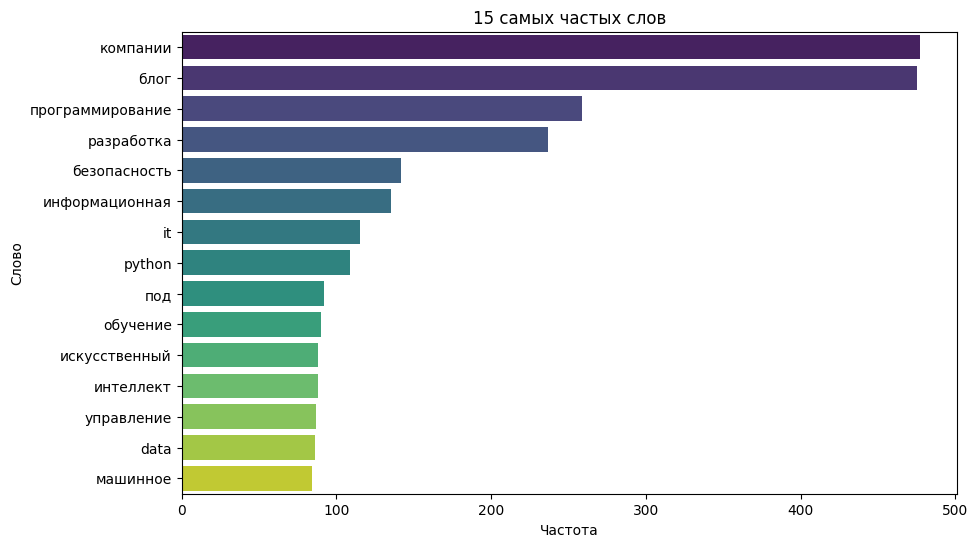

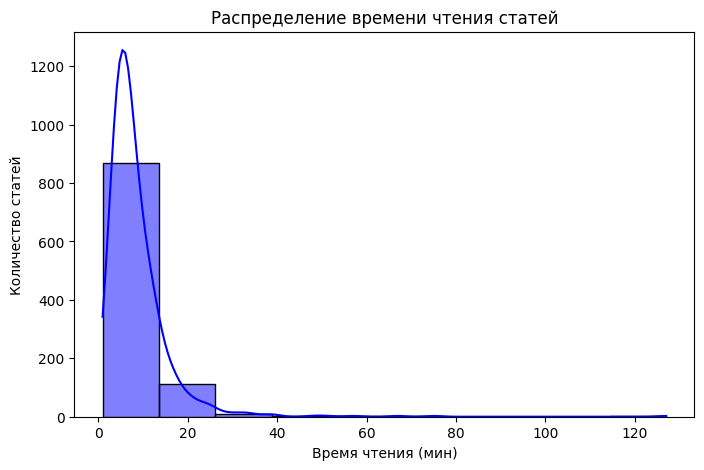

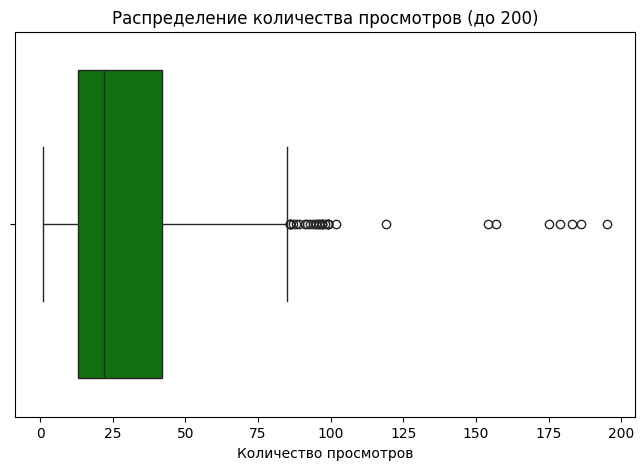

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

data = pd.read_csv("habr_articles.csv")

print(data.head())
data_cleaned = data.dropna(subset=["Название", "Ссылка"])
data_cleaned = data_cleaned[data_cleaned["Название"] != "Название не найдено"]

print(f"Очищенные данные: {data_cleaned.shape[0]} записей")
all_text = " ".join(data_cleaned["Название"]) + " " + " ".join(data_cleaned["Ключевые слова"])
all_text = re.sub(r"[^\w\s]", "", all_text)

words = all_text.lower().split()
stop_words = set(["и", "в", "на", "с", "по", "для", "о", "это", "как", "что", "из", "быть", "или", "не"])

words_filtered = [word for word in words if word not in stop_words]
word_counts = Counter(words_filtered)

print("10 самых частых слов:")
print(word_counts.most_common(10))

word_freq = pd.DataFrame(word_counts.most_common(15), columns=["Слово", "Частота"])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq, x="Частота", y="Слово", palette="viridis")
plt.title("15 самых частых слов")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.show()

data_cleaned["Время чтения (мин)"] = data_cleaned["Время чтения"].str.extract(r"(\d+)").astype(float)


plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned["Время чтения (мин)"], bins=10, kde=True, color="blue")
plt.title("Распределение времени чтения статей")
plt.xlabel("Время чтения (мин)")
plt.ylabel("Количество статей")
plt.show()
data_cleaned["Просмотры (кол-во)"] = data_cleaned["Просмотры"].str.replace(r"[^\d]", "", regex=True).astype(float)

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned[data_cleaned["Просмотры (кол-во)"] <= 200], x="Просмотры (кол-во)", color="green")
plt.title("Распределение количества просмотров (до 200)")
plt.xlabel("Количество просмотров")
plt.show()

